<a href="https://colab.research.google.com/github/JeanMusenga/ASSORT-Automatic-Summarization-of-Stack-Overflow-Posts/blob/main/Classifiers_with_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important and helpful sources
https://www.youtube.com/watch?v=P47raNuzAW0
https://github.com/PradipNichite/Youtube-Tutorials/blob/main/Yotutube_WordVectors.ipynb


In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
import gensim
from spacy.tokenizer import Tokenizer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.tokenizer import Tokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string


# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
dataset=pd.read_excel('14932_ARPs_and_Programming_Posts.xlsx')

In [4]:
dataset.shape

(14932, 4)

In [5]:
class_distribution = dataset['Label'].value_counts()
print(class_distribution)

Label
0    7466
1    7466
Name: count, dtype: int64


In [6]:
dataset.head()

,No.,Question_body,Label,Type
0,7466,You must insert regiseterd program name instea...,0,Programming Post
1,7466,I'm pretty new to my company (2 weeks) and we'...,1,ARP
2,7465,If anything I would hazard that you have compi...,0,Programming Post
3,7465,Say you have an application divided into 3-tie...,1,ARP
4,7464,"Welcome to Stackoverflow, the library you are ...",0,Programming Post


# Proporcessing

In [7]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Ensure the text is a string
    if not isinstance(text, str):
        text = str(text)

    # Tokenize text
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    return ' '.join(lemmatized)


# Ensure all values in 'Question_body' are strings and handle NaNs and # Convert 'Question_body' to string (to avoid NaN issues)
dataset['Question_body'] = dataset['Question_body'].fillna('').astype(str)

# Apply the preprocessing function
dataset['Question_body_preprocessed_W2V'] = dataset['Question_body'].apply(preprocess_text)

In [8]:
# Save the updated DataFrame to an Excel file
dataset.to_excel('14932_ARPs_and_Programming_Posts.xlsx', index=False)

dataset.head()

,No.,Question_body,Label,Type,Question_body_preprocessed_W2V
0,7466,You must insert regiseterd program name instea...,0,Programming Post,must insert regiseterd program name instead cl...
1,7466,I'm pretty new to my company (2 weeks) and we'...,1,ARP,pretty new company week starting new platform ...
2,7465,If anything I would hazard that you have compi...,0,Programming Post,anything would hazard compiler optimisation tu...
3,7465,Say you have an application divided into 3-tie...,1,ARP,say application divided gui business logic dat...
4,7464,"Welcome to Stackoverflow, the library you are ...",0,Programming Post,welcome stackoverflow library using show examp...


# Feature Vectors Engineering

In [9]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


## Loading the 'word2vec-google-news-300

In [10]:
pretrained_Word2vec_Model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


##  Download and Save the Model to Google Drive: This is for my internal learning

In [38]:
def sent_vec(sent):
    vector_size = pretrained_Word2vec_Model.vector_size
    pretrained_res = np.zeros(vector_size)
    # print(wv_res)
    string = 1
    for w in sent:
        if w in pretrained_Word2vec_Model:
            string += 1
            pretrained_res += pretrained_Word2vec_Model[w]
    pretrained_res = pretrained_res/string
    return pretrained_res

In [12]:
dataset['Embeddings_W2V'] = dataset['Question_body_preprocessed_W2V'].apply(sent_vec)

In [39]:
# Save the embedding to dataframce in an Excel file
dataset.to_excel('14932_ARPs_and_Programming_Posts.xlsx', index=False)

dataset.head()

,No.,Question_body,Label,Type,Question_body_preprocessed_W2V,Embeddings_W2V
0,7466,You must insert regiseterd program name instea...,0,Programming Post,must insert regiseterd program name instead cl...,"[-0.16085849719101122, 0.10134579090589887, -0..."
1,7466,I'm pretty new to my company (2 weeks) and we'...,1,ARP,pretty new company week starting new platform ...,"[-0.18871478782351322, 0.10751705757846916, -0..."
2,7465,If anything I would hazard that you have compi...,0,Programming Post,anything would hazard compiler optimisation tu...,"[-0.16027992650082237, 0.11534573739035088, -0..."
3,7465,Say you have an application divided into 3-tie...,1,ARP,say application divided gui business logic dat...,"[-0.1801995070822515, 0.11440360864475148, 0.0..."
4,7464,"Welcome to Stackoverflow, the library you are ...",0,Programming Post,welcome stackoverflow library using show examp...,"[-0.1683807373046875, 0.11575273786272322, -0...."


In [40]:
x = dataset['Embeddings_W2V'].to_list()
y = dataset['Label'].to_list()

# Split dataset

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=125)

# Naive Bayes with W2vect

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [44]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [45]:
#print(classification_report(y_test, y_pred))

In [46]:
y_pred = nb_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}')



Overall Accuracy: 0.5432704727460604
Class 0 - Precision: 0.7836312323612418, Recall: 0.5601882985877606, F1-score: 0.6533333333333333, Support: 1487
Class 1 - Precision: 0.66008316008316, Recall: 0.8466666666666667, F1-score: 0.741822429906542, Support: 1500


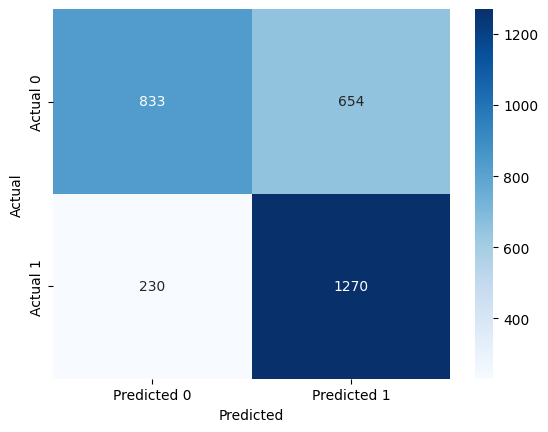

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# kNN with W2vect

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
#print(classification_report(y_test, y_pred))

In [51]:
y_pred = knn_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}')


Overall Accuracy: 0.4938734683670918
Class 0 - Precision: 0.7225866916588566, Recall: 0.5184936112979153, F1-score: 0.6037588097102584, Support: 1487
Class 1 - Precision: 0.6270833333333333, Recall: 0.8026666666666666, F1-score: 0.704093567251462, Support: 1500


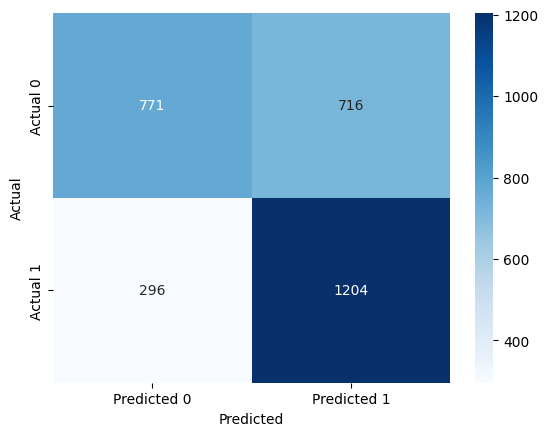

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression with W2vect

In [53]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(C=5, penalty='l1', solver='liblinear')
lg_model = lg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
y_pred = lg_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}')

Overall Accuracy: 0.5758375098918491
Class 0 - Precision: 0.7581254724111867, Recall: 0.6745124411566913, F1-score: 0.7138790035587189, Support: 1487
Class 1 - Precision: 0.7091346153846154, Recall: 0.7866666666666666, F1-score: 0.7458912768647282, Support: 1500


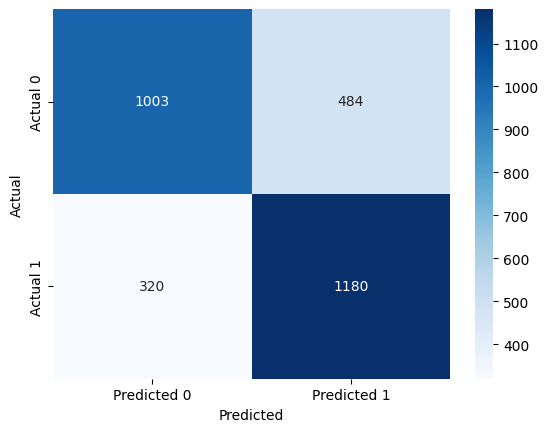

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decison Tree with W2vect

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)

In [57]:
#print(classification_report(y_test, y_pred))

In [58]:
y_pred = dt_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}')

Overall Accuracy: 0.491263105341987
Class 0 - Precision: 0.6553784860557769, Recall: 0.6637525218560861, F1-score: 0.6595389241563648, Support: 1487
Class 1 - Precision: 0.662390276839973, Recall: 0.654, F1-score: 0.6581683998658169, Support: 1500


# Confusion Matrix for DT Model :
Display the matrix with TP, TN, FP, FN counts.
https://chatgpt.com/share/2f5dfec4-026c-4017-944e-7720f539930f

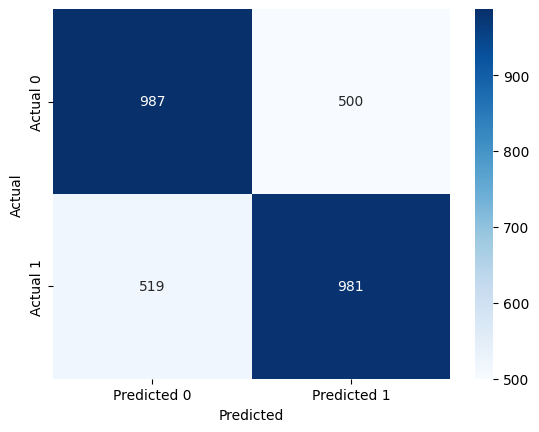

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM with W2vect

In [60]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
#print(classification_report(y_test, y_pred))

In [65]:
# Compute predictions
y_pred = svm_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}')

Overall Accuracy: 0.5696269048870205
Class 0 - Precision: 0.8092592592592592, Recall: 0.5877605917955615, F1-score: 0.6809505259057266
Class 1 - Precision: 0.6785527005768223, Recall: 0.8626666666666667, F1-score: 0.7596125623715879


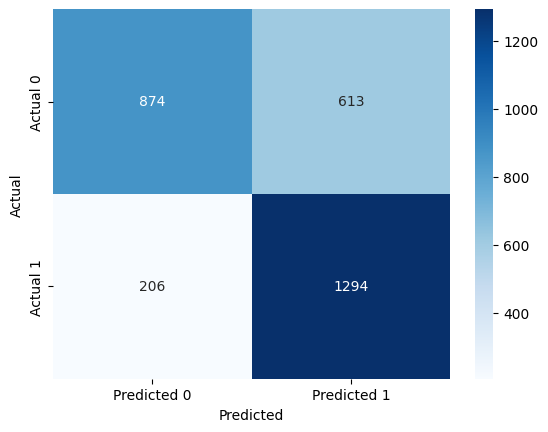

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()